This part display the video with limited amount with the frame index


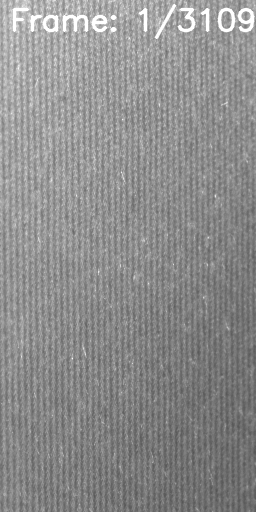

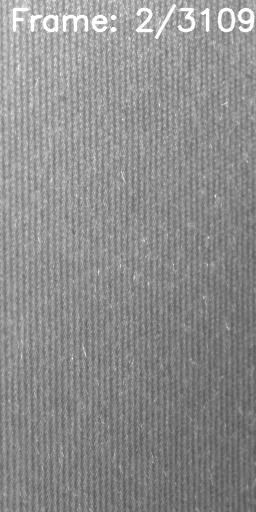

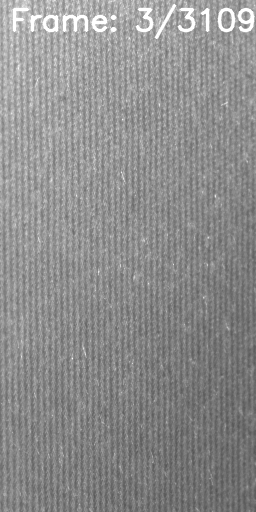

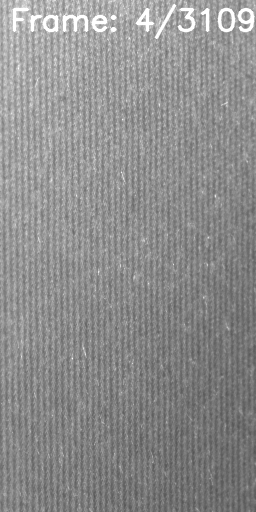

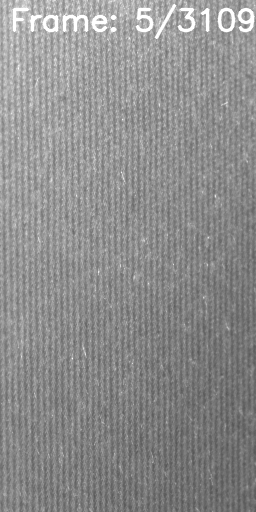

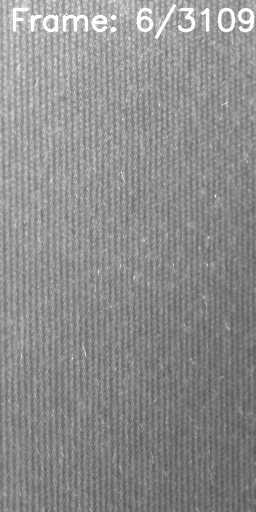

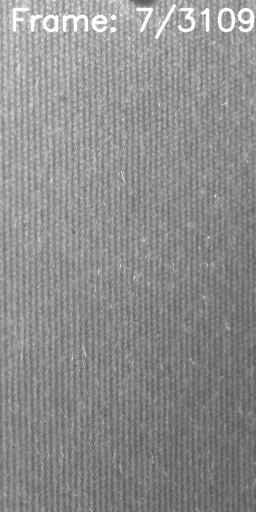

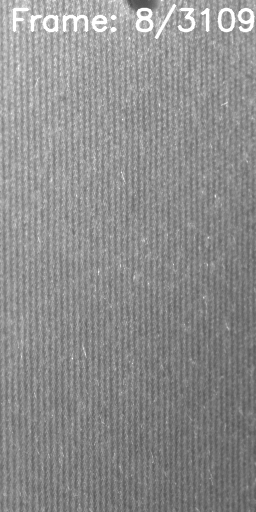

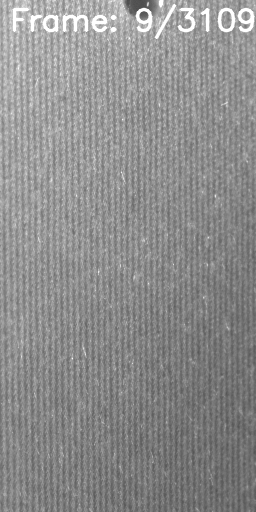

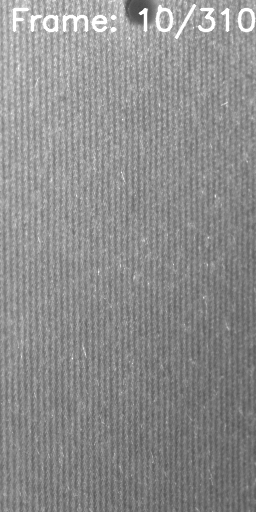

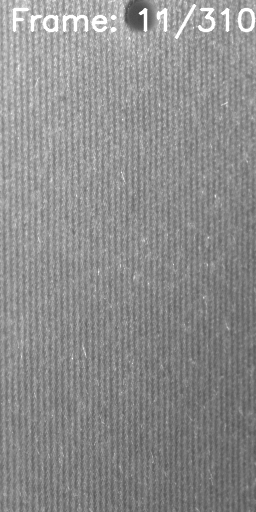

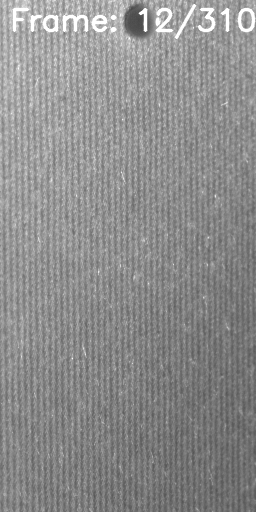

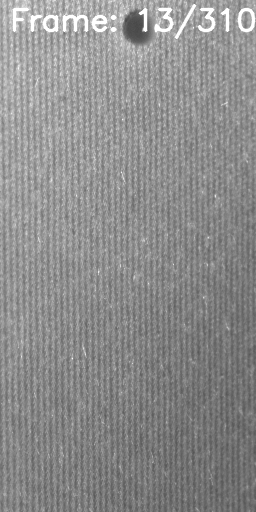

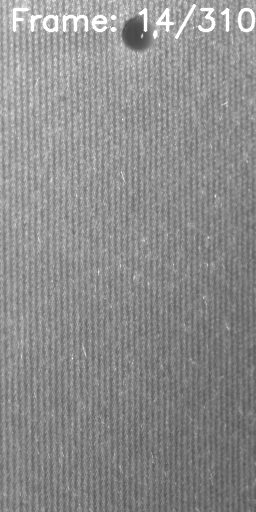

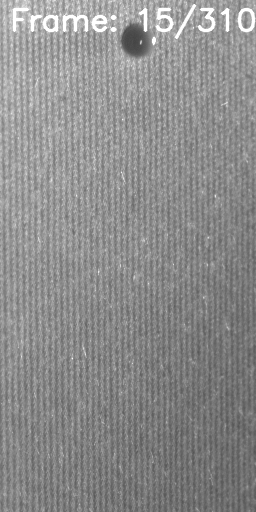

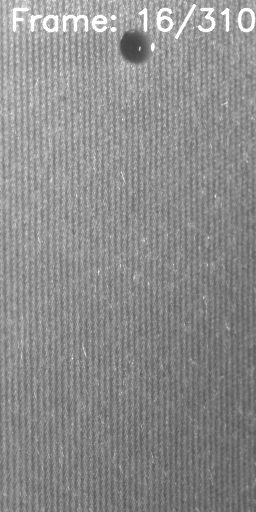

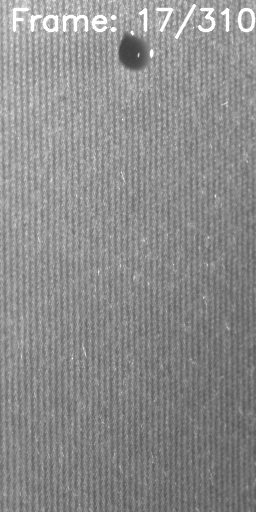

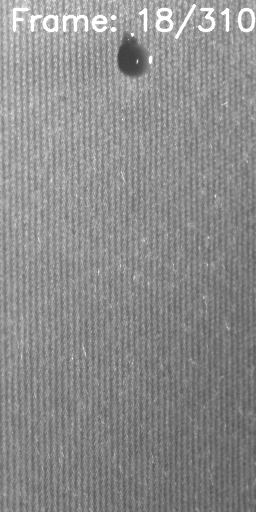

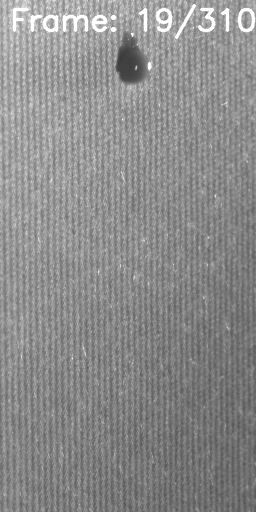

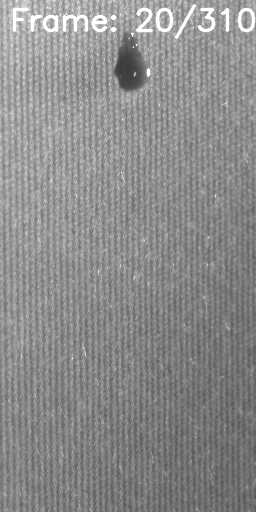

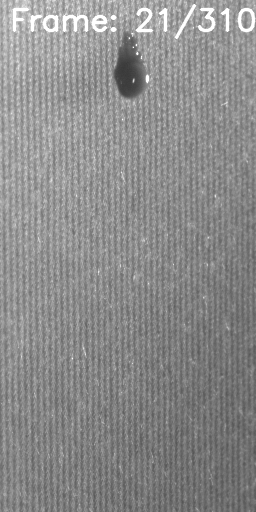

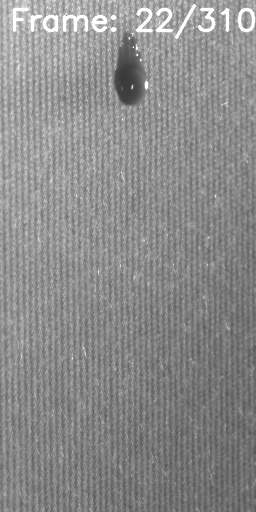

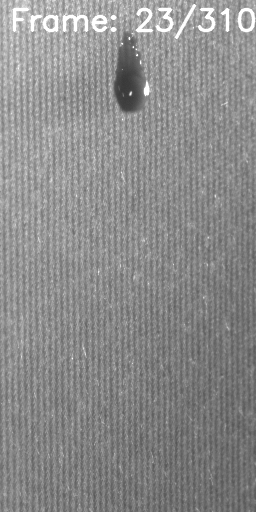

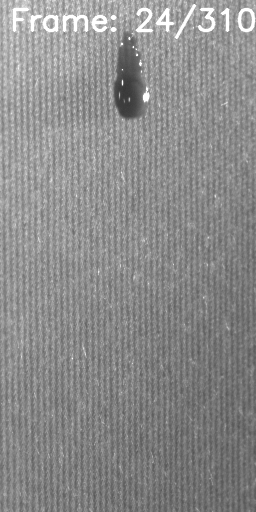

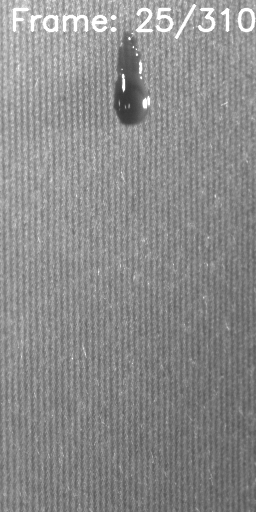

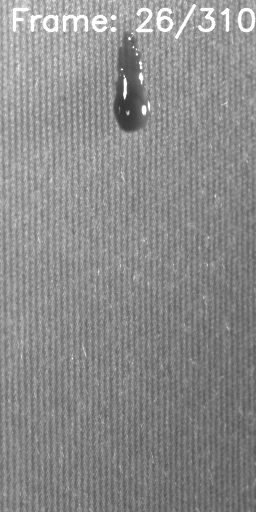

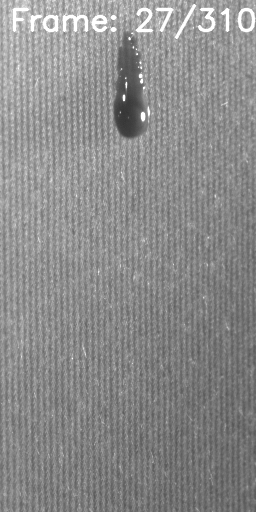

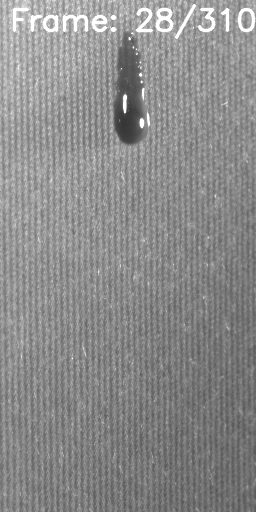

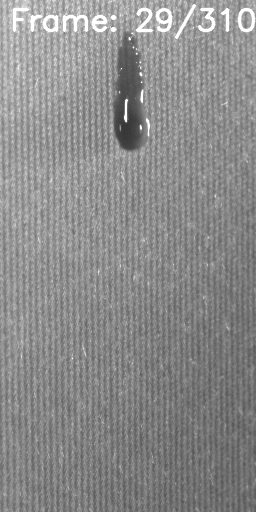

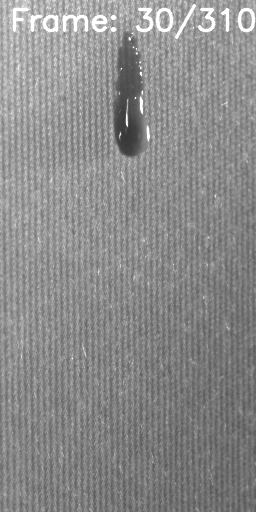

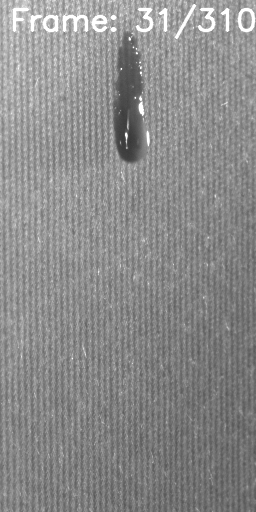

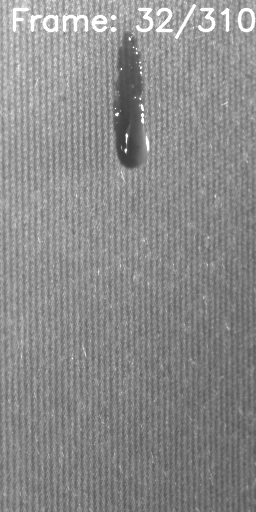

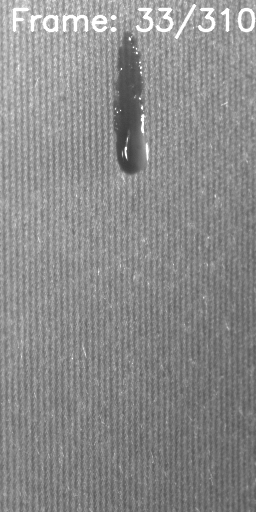

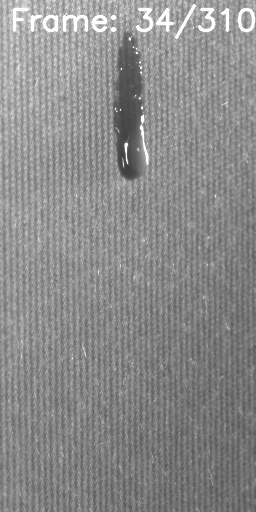

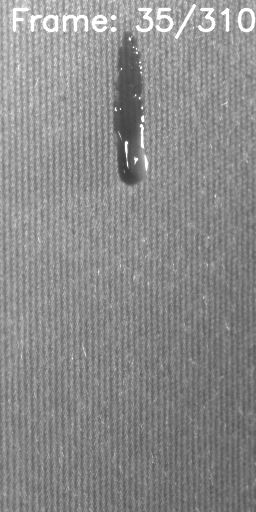

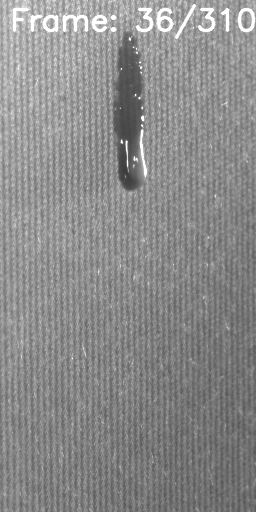

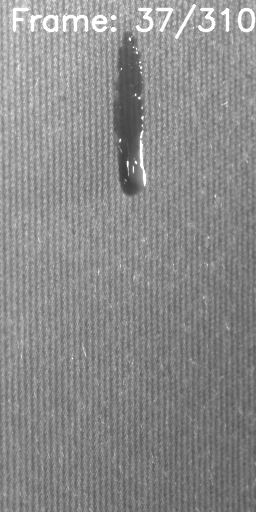

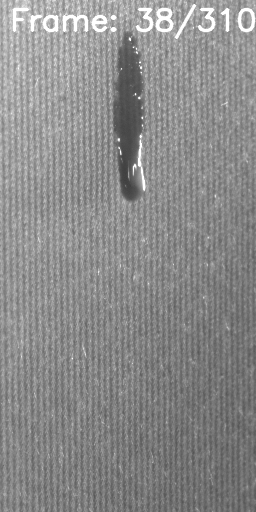

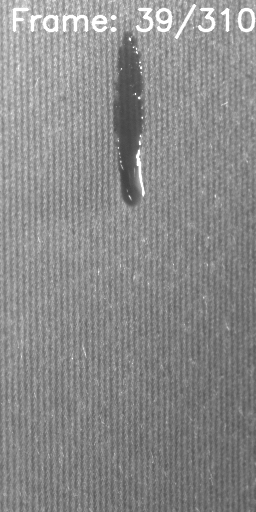

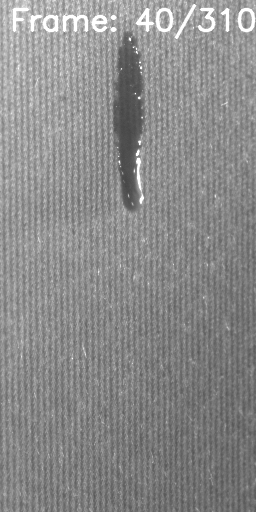

In [ ]:
from IPython.display import HTML
from base64 import b64encode
from google.colab.patches import cv2_imshow
import cv2

def show_video(video_path, video_width=600):
    video_file = open(video_path, "r+b").read()
    video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
    return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

def play_video_with_frame_count(video_path):
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    frame_num = 0
    while(cap.isOpened()):
        ret, frame = cap.read()
        if not ret or frame_num >= 40: # Change the value here to change how many frames will be displayed
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(gray, f"Frame: {int(cap.get(cv2.CAP_PROP_POS_FRAMES))}/{frame_count}",
                    (10, 30), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
        cv2_imshow(gray)

        frame_num += 1

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

video_path = '/content/drive/Shareddrives/video.cine'
show_video(video_path)
play_video_with_frame_count(video_path)


This part try to use threshold and determine where the video start

*Line number 7 should be changed based on differnt video quality. **

This is the code to find the 100 most significantly changed frames.

In [ ]:
import cv2

# Set the video file path
video_path = '/content/drive/Shareddrives/video.mp4'

# Initialize variables for storing previous and current frames
prev_frame = None
curr_frame = None

# Initialize variables for storing frame index and significant changes
frame_index = 0
significant_changes = []
frame_captured = 0
# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the video frame rate and size
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Loop through the video frames
while cap.isOpened():
    # Read the current frame
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # If this is not the first frame, calculate the difference with the previous frame
    if prev_frame is not None:
        diff_frame = cv2.absdiff(gray_frame, prev_frame)
        diff_sum = diff_frame.sum()
        significant_changes.append((frame_index, diff_sum))

    # Set the previous frame to the current frame for the next iteration
    prev_frame = gray_frame
    frame_index += 1

    # Break the loop if 100 frames have been captured
    if frame_captured == 100:
        break

# Sort the significant changes based on the difference sum in descending order
significant_changes.sort(key=lambda x: x[1], reverse=True)

# Get the top 100 most significant changes
top_100_changes = significant_changes[:100]

# Print the frame index and difference sum for the top 100 changes
for index, diff_sum in top_100_changes:
    print("Significant change detected at frame:", index, ", Threshold is:", diff_sum)
    frame_captured += 1

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()


Significant change detected at frame: 25 , Threshold is: 273326
Significant change detected at frame: 27 , Threshold is: 272164
Significant change detected at frame: 26 , Threshold is: 268128
Significant change detected at frame: 28 , Threshold is: 268100
Significant change detected at frame: 24 , Threshold is: 267366
Significant change detected at frame: 29 , Threshold is: 262987
Significant change detected at frame: 14 , Threshold is: 261871
Significant change detected at frame: 13 , Threshold is: 260714
Significant change detected at frame: 15 , Threshold is: 259856
Significant change detected at frame: 36 , Threshold is: 258019
Significant change detected at frame: 17 , Threshold is: 257719
Significant change detected at frame: 30 , Threshold is: 257552
Significant change detected at frame: 16 , Threshold is: 257048
Significant change detected at frame: 12 , Threshold is: 256746
Significant change detected at frame: 31 , Threshold is: 256642
Significant change detected at frame: 18

This is the section by given threshold, and find the frames that above threshold.

In [ ]:
import cv2

# Set the video file path
video_path = '/content/drive/Shareddrives/video.cine'

# Set the threshold for detecting changes in the frames
threshold = 250792 ## This part need to be changed based on differnet video

# Initialize variables for storing previous and current frames
prev_frame = None
curr_frame = None

# Initialize variable for storing frame index
frame_index = 0
frame_captured = 0
frame_indexs = []
# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the video frame rate and size
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))



# Loop through the video frames
while cap.isOpened():
    # Read the current frame
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # If this is not the first frame, calculate the difference with the previous frame
    if prev_frame is not None:
        diff_frame = cv2.absdiff(gray_frame, prev_frame)

        # Sum the pixel differences in the frame
        diff_sum = diff_frame.sum()
        # If the sum is above the threshold, output the frame index
        if diff_sum > threshold:
            print("Significant change detected at frame:", frame_index, ", Threshold is:", diff_sum)
            frame_indexs.append(frame_index)

            frame_captured += 1

    # Set the previous frame to the current frame for the next iteration
    prev_frame = gray_frame

    # Increment the frame index
    frame_index += 1
start_frame = frame_indexs[0]
end_frame = frame_index
# Release the video capture and close all windows
print(frame_captured)
print("Variable frame_index[0] wil return the first frame been captured and can be sued in the next section. first captured frame is: " ,frame_indexs[0])
print("video is ", fps," frames per second")
print("ending frame is:", frame_index)
cap.release()
cv2.destroyAllWindows()

## Goal: make the first frame as a variable

Significant change detected at frame: 11 , Threshold is: 251898
Significant change detected at frame: 12 , Threshold is: 256746
Significant change detected at frame: 13 , Threshold is: 260714
Significant change detected at frame: 14 , Threshold is: 261871
Significant change detected at frame: 15 , Threshold is: 259856
Significant change detected at frame: 16 , Threshold is: 257048
Significant change detected at frame: 17 , Threshold is: 257719
Significant change detected at frame: 18 , Threshold is: 255699
Significant change detected at frame: 19 , Threshold is: 253718
Significant change detected at frame: 20 , Threshold is: 252277
Significant change detected at frame: 21 , Threshold is: 252372
Significant change detected at frame: 22 , Threshold is: 251787
Significant change detected at frame: 23 , Threshold is: 254996
Significant change detected at frame: 24 , Threshold is: 267366
Significant change detected at frame: 25 , Threshold is: 273326
Significant change detected at frame: 26

Cut frames out and save it to folder from a folder of videos

In [ ]:
import cv2
import os
from tkinter import filedialog
import tkinter as tk


def save_all_folder(folder_path):
    file_list = [f for f in os.listdir(folder_path) if f.endswith(extension)]
    for file_name in file_list:
        file_path = os.path.join(folder_path, file_name)
        output_name = file_name.replace(extension, '')
        output_path = os.path.join(folder_path, 'images')
        save_all_frames(file_path, output_path, output_name)

    return


# save_all_frames('data/temp/sample_video.mp4', 'data/temp/result_png', 'sample_video_img', 'png')
def save_all_frames(video_path, dir_path, basename, ext='jpg'):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        return

    os.makedirs(dir_path, exist_ok=True)
    base_path = os.path.join(dir_path, basename)

    digit = len(str(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))))
    n = 0
    while True:
        ret, frame = cap.read()
        if ret:
            cv2.imwrite('{}_{}.{}'.format(base_path, str(n).zfill(digit), ext), frame)
            n += 1
        else:
            return


folder_path = "[videos folder]"
print(folder_path)
##define the file type
extension = ".mp4"
save_all_folder(folder_path)